<a href="https://colab.research.google.com/github/giovanimachado/phd-puc/blob/main/computacao-evolucionaria/Aula07_DENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Instalar pacote DEAP e importar o que for necessário

In [1]:
# https://deap.readthedocs.io/en/master/
!pip install deap

In [2]:
# Bibliotecas a serem utilizadas
import random
import numpy as np
import math
from deap import algorithms
from deap import base
from deap import creator
from deap import tools

## Preparação para Otimização

1.   Função Objetivo
2.   Penalização
3.   Variáveis de Decisão
4.   Operadores



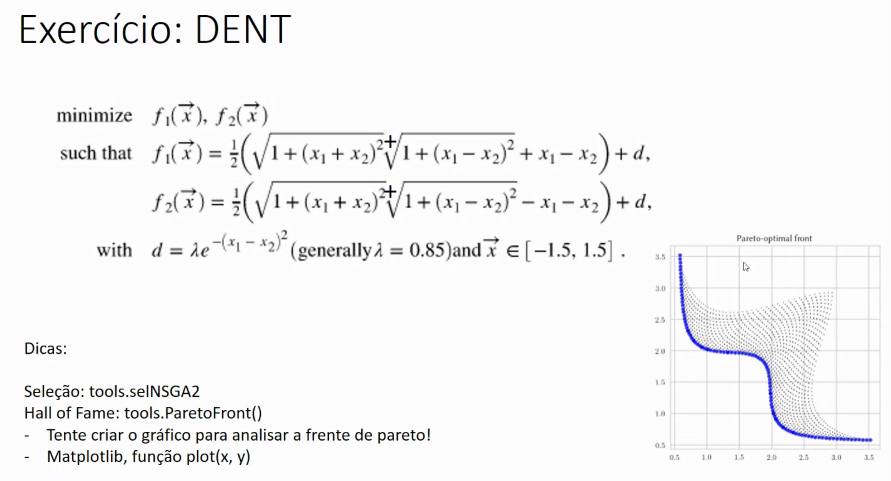

In [3]:
#Função Objetivo
def objective_function(individual):
  l = .85
  
  d = l * np.exp(-1*(individual[0]-individual[1])**2)

  f1 = (1/2 * (np.sqrt(1+(individual[0]+individual[1])**2) + 
                      np.sqrt(1+(individual[0]-individual[1])**2) + 
                      individual[0]-individual[1]) + d)
  
  f2 = (1/2 * (np.sqrt(1+(individual[0]+individual[1])**2) + 
                       np.sqrt(1+(individual[0]-individual[1])**2) - 
                       individual[0]+individual[1]) + d)
  
  return (f1, f2)

In [4]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,-1.0))        # função objetivo: nome, tipo(f.o.), peso de cada objetivo (no caso só um objetivo)
creator.create("Individual", list,  fitness=creator.FitnessMin)        # indivíduo

In [5]:
lb = -1.5
ub = 1.5

In [6]:
toolbox = base.Toolbox()

# Gerador de atributos reais: nome, tipo das variáveis, intervalo (limites inferior e superior)
#toolbox.register("attr_int", random.randint, 0, 30000) # variáveis inteiras
toolbox.register("attr_real", random.uniform, lb, ub) # variáveis reais

# Inicializador de indivíduo e população
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 2)   # 2: número de variáveis de decisão - criar indivíduo
toolbox.register("population", tools.initRepeat, list, toolbox.individual)                  # lista de indivíduos - criar população

In [7]:
# Incializador de operadores
toolbox.register("evaluate", objective_function)                              # função objetivo
toolbox.register("mate", tools.cxSimulatedBinaryBounded, eta=0.5, low=lb, up=ub)
#toolbox.register("mutate", tools.mutUniformInt, low=lb, up=ub, indpb=0.05)
toolbox.register("mutate", tools.mutPolynomialBounded, low=lb, up=ub, indpb=0.5, eta=0.5)
#toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("select", tools.selNSGA2)


In [8]:
pop = toolbox.population(n=500)                            # inicialização da pop
hof = tools.ParetoFront()                                 # melhor indivíduo
stats = tools.Statistics(lambda ind: ind.fitness.values)  # estatísticas
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

## Otimização

In [9]:
pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.1, ngen=20, stats=stats, halloffame=hof)

gen	nevals	avg    	std     	min     	max    
0  	500   	1.91374	0.700641	0.593151	3.33334
1  	307   	1.92762	0.682794	0.587653	3.41875
2  	277   	1.89528	0.696464	0.586525	3.4333 
3  	273   	1.9012 	0.700501	0.583624	3.49885
4  	251   	1.89778	0.691468	0.583624	3.49885
5  	277   	1.88398	0.68396 	0.584033	3.48894
6  	249   	1.87848	0.681995	0.584033	3.48894
7  	261   	1.84586	0.700215	0.583449	3.50358
8  	281   	1.86424	0.691173	0.583449	3.50358
9  	263   	1.86581	0.693231	0.583449	3.50358
10 	280   	1.86459	0.683671	0.583449	3.50358
11 	263   	1.87452	0.671615	0.583449	3.50358
12 	273   	1.85891	0.679733	0.581656	3.56767
13 	277   	1.85799	0.684496	0.581656	3.56767
14 	300   	1.85785	0.684559	0.586321	3.41777
15 	264   	1.86169	0.679373	0.586546	3.41777
16 	263   	1.86755	0.676042	0.584093	3.51606
17 	289   	1.86109	0.68172 	0.584093	3.51606
18 	295   	1.86342	0.691491	0.584093	3.51606
19 	260   	1.87299	0.67961 	0.590406	3.44421
20 	273   	1.87686	0.682917	0.586464	3.46745


## Resultados

In [10]:
len(pop)

500

In [11]:
# frente de pareto (soluções não dominadas)
pareto_front = tools.sortNondominated(pop, len(pop), first_front_only=True)[0]
print(pareto_front)
print(len(pareto_front))

[[-0.23069994190616433, 0.1977243825312904], [-0.08014390538883613, 0.18269188343700224], [-0.8248749352163651, 0.76142138970324], [-1.1838225498254418, 1.2624149891483412], [-1.1261721078245654, 1.0178109963413111], [0.6908896857285299, -0.8838342837085915], [0.7113687905656015, -0.7746185767809572], [-1.4984442095985073, 1.3553550927417555], [-0.40072157546194365, 0.5910760755971991], [0.7942754237311065, -0.9470717402927696], [0.03455593264265233, -0.12901783850726686], [-0.376299673643158, 0.5705836277600115], [1.0128359351875267, -0.9835705576657356], [0.4955917842463823, -0.7222234243412705], [0.8256119781322733, -0.5012702933717107], [1.203980139995613, -1.3213341999679493], [0.7870003128591986, -0.5117685925370095], [-1.3100046131613525, 1.3645177523867638], [0.5125044275893852, -0.6268245818386909], [0.22881603804294148, -0.17533433025045927], [-0.38500527455740746, 0.37815059244167804], [0.747346613608764, -0.8938791188358844], [1.136905047301469, -1.1536138248582701], [-0.99

In [18]:
# Melhor solução
print("Melhor Indivíduo:")
print(hof[0])

# Melhor resultado da função objetivo
print("Melhor Resultado da Função Objetivo:")
objective_function(hof[0])

Melhor Indivíduo:
[-1.4978547757603748, 1.434114368813734]
Melhor Resultado da Função Objetivo:


(0.5840934684601586, 3.516062613034268)

Gráfico da Evolução

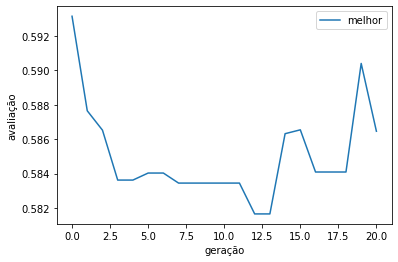

In [16]:
import matplotlib.pyplot as plt
gen, min, avg = log.select('gen', 'min', 'avg')
plt.plot(gen, min, label='melhor')
# plt.plot(gen, avg, label='média')
plt.ylabel('avaliação')
plt.xlabel('geração')
plt.legend();

In [14]:
objective_function([-1.3906921986890894, 1.4592145142099264])

(0.5866013161928029, 3.436508029091819)

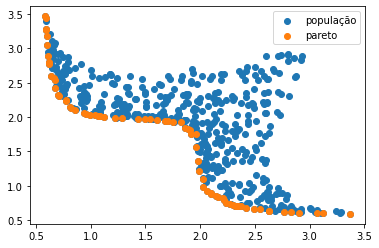

In [15]:
import matplotlib.pyplot as plt
f1s = []
f2s = []
for i in pop:
  f1s.append(i.fitness.values[0])
  f2s.append(i.fitness.values[1])

plt.scatter(f1s, f2s, label='população');

f1s = []
f2s = []
for i in pareto_front:
  f1s.append(i.fitness.values[0])
  f2s.append(i.fitness.values[1])

plt.scatter(f1s, f2s, label='pareto');
plt.legend();